<center>
    <hr> 
    <h1> Regressão Linear </h1>
    <br>
    <I> Feito por Yasmin Miranda, no dia 13/12/2022 </I>
    <hr> 
</center>

<center>
    <font size = "4" color = "#003666"> <B> Importando bibliotecas necessárias: </B> </font> 
</center>

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn

from patsy import dmatrices
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
sns.set()

<center> 
    <font size = "4" color = "#003666"> <B> Checando endereço do diretório: </B> </font> 
</center>

In [3]:
import os
os.getcwd() 

'C:\\Users\\yasmi\\Documents\\Arquivos no Jupyter Notebook'

<center>
<font size = "4" color = "#003666"> <B> Lendo, editando e visualizando a base de dados: </B> </font> 
</center>

In [4]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


sat = leitura critica + matematica +redação

gpa = media de notas na graduação

In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


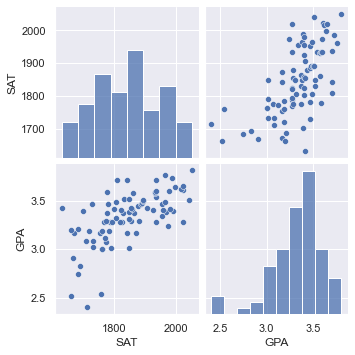

In [6]:
sns.pairplot(data)

In [7]:
y = data['GPA'] #variavel resposta
x1 = data['SAT'] #variavel explicativa

In [8]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


<center>
<font size = "4" color = "#003666"> <B> Ajustando modelo de regressão simples: </B> </font> 
</center>

In [9]:
x = sm.add_constant(x1) #matriz de especificação
reg = sm.OLS(y,x).fit()
reg.summary()

C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           7.20e-11
Time:                        20:15:18   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

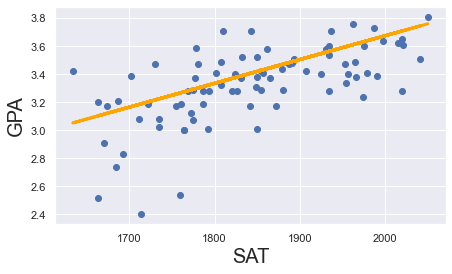

In [10]:
plt.figure(figsize=(7, 4))
plt.scatter(x1,y)
yhat = 0.0017*x1+0.275
fig = plt.plot(x1, yhat, lw = 3, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

<center>
<font size = "4" color = "#003666"> <B> Avaliando Hipótese Nula de Homoscedasticidade: </B> </font> 
</center>

Text(0, 0.5, 'Resíduos')

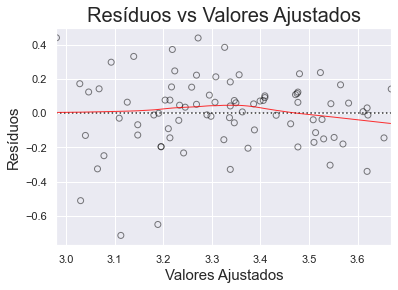

In [11]:
# valores ajustados
y_ajust = reg.fittedvalues

plot = sns.residplot(x=y_ajust, y='GPA', data=data, lowess=True, 
                     scatter_kws={'facecolors':'none', 'edgecolors':'black','alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot.set_title('Resíduos vs Valores Ajustados', fontsize=20)
plot.set_xlabel('Valores Ajustados', fontsize=15)
plot.set_ylabel('Resíduos', fontsize=15)

C:\Users\yasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

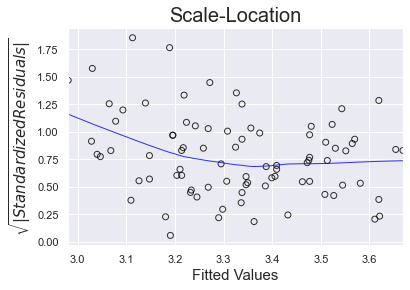

In [12]:
sns.regplot(reg.fittedvalues, 
           np.sqrt(np.abs(reg.get_influence().resid_studentized_internal)), 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
          scatter_kws={'facecolors':'none', 'edgecolors':'black'})

plt.title('Scale-Location', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)

In [13]:
medidas = ['Estatística Multiplicador de Lagrange ', 'Valor p Lagrange', 
           'Estatística F', 'Valor p F']
teste = sm.stats.het_breuschpagan(reg.resid, reg.model.exog)
lzip(medidas, teste)

[('Estatística Multiplicador de Lagrange ', 7.485919410763525),
 ('Valor p Lagrange', 0.006218331036240249),
 ('Estatística F', 8.02264611892835),
 ('Valor p F', 0.00581137581407838)]

<center>
<font size = "4" color = "#003666"> <B> Avaliando Hipótese de Erros com Distribuição Normal: </B> </font> 
</center>

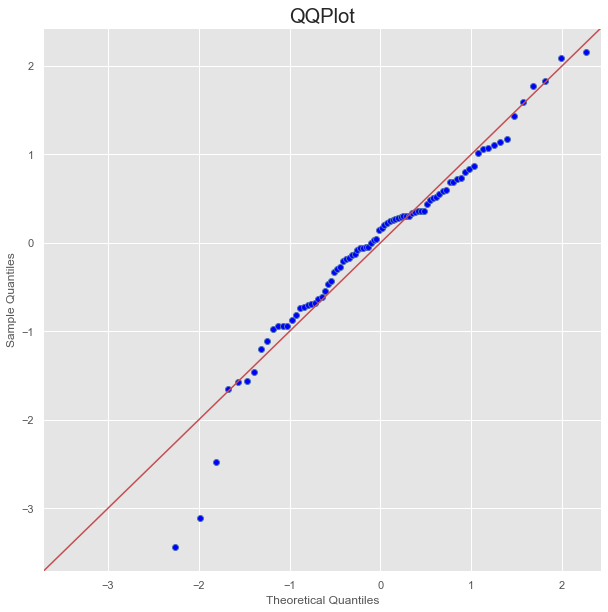

In [14]:
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(reg.get_influence().resid_studentized_internal, fit=True)

fig = probplot.qqplot(line='45', marker='o')
plt.title('QQPlot', fontsize=20)
plt.show()

Apesar de já termos essa informação no resumo do modelo, apresentado anteriormente. Faremos:

In [15]:
normal = ['Jarque-Bera', 'Valor p bicauldal da Qui Quadrado', 'Assimetria', 'Curtose']
teste2 = sm.stats.jarque_bera(reg.resid)

lzip(normal, teste2)

[('Jarque-Bera', 16.155209705526833),
 ('Valor p bicauldal da Qui Quadrado', 0.00031041363210255064),
 ('Assimetria', -0.7224748823005239),
 ('Curtose', 4.589935338106073)]

Ademais, o valor P da Estatistica Omnibus também é menor que 0.05

In [16]:
reg.resid.mean()

-6.344131569286608e-17

<center>
<font size = "4" color = "#003666"> <B> Avaliando distância de Cook: </B> </font> 
</center>

<Figure size 504x288 with 0 Axes>

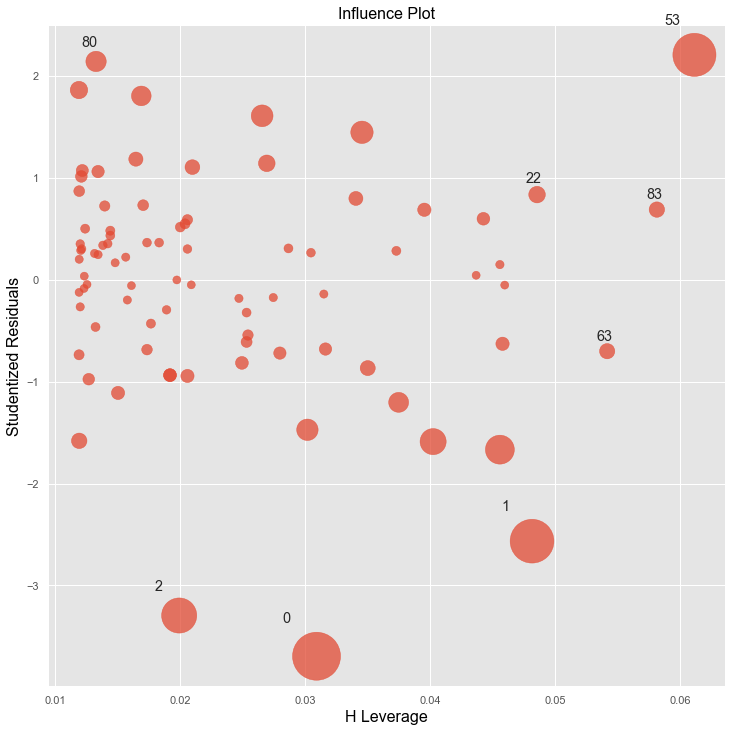

In [17]:
plt.figure(figsize=(7, 4))
fig = sm.graphics.influence_plot(reg, criterion="cooks")
fig.tight_layout(pad=0.1)

In [18]:
# obtendo distancia de Cook 
reg_dcook = reg.get_influence().cooks_distance[0]

# total de observações
n = len(data["SAT"])

# valor critico d
d_crit = 4/n
print('Distância Critica de Cook:', round(d_crit,4),"\n")

#identificando possiveis outliers com alavancagem
out_d = reg_dcook > d_crit

print(data.index[out_d], "\n ", 
    reg_dcook[out_d])

Distância Critica de Cook: 0.0476 

Int64Index([0, 1, 2, 3, 28, 53], dtype='int64') 
  [0.18852515 0.15583518 0.09849061 0.05195708 0.06500254 0.15102265]


<center>
<font size = "4" color = "#003666"> <B> Descisão da analista: </B> </font> 
</center>

Após ajustar o modelo e realizar o diagnóstico, recomendo não modelar o GPA a partir do SAT. Os motivos são que o $R^2$ é relativamente baixo, bem como, as hipóteses usuais da modelagem de Regressão Linear Simples são violadas.